In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

import scienceplots
plt.style.use(['science'])
plt.rcParams.update({'font.size': 30, 'font.family':'sans-serif', 'legend.fontsize':16})


In [2]:
data_set1 = pd.read_excel('GeoPhase.xlsx',usecols= [0,1,2,3,4], header=0, nrows=12,sheet_name='Sheet2').dropna()
data_set2 = pd.read_excel('GeoPhase.xlsx',usecols= [0,1,2,3,4], header=0, nrows=12,sheet_name='Sheet3').dropna()
data_set3 = pd.read_excel('GeoPhase.xlsx',usecols= [0,1,2,3,4], header=0, nrows=12,sheet_name='inv setup').dropna()


In [3]:
data_set1

,msd,angle diff,beta,beta diff,fringe shift
1,352,168,6.143559,2.932153,1
2,520,168,9.075712,2.932153,2
3,618,98,10.786135,1.710423,3
4,864,246,15.079645,4.293510,4
5,1002,138,17.488199,2.408554,5
6,1228,226,21.432643,3.944444,6
7,1384,156,24.155357,2.722714,7
8,1598,214,27.890361,3.735005,8
9,1790,192,31.241394,3.351032,9
10,2004,214,34.976398,3.735005,10


In [4]:
data_set2

,msd,angle diff,beta,beta diff,fringe shift
1,468,154,8.168141,2.687807,1
2,604,136,10.541789,2.373648,2
3,812,208,14.172074,3.630285,3
4,938,126,16.371188,2.199115,4
5,1148,210,20.036380,3.665191,5
6,1280,132,22.340214,2.303835,6
7,1464,184,25.551620,3.211406,7
8,1630,166,28.448867,2.897247,8
9,1834,204,32.009338,3.560472,9
10,1664,-170,29.042279,-2.967060,10


In [5]:
data_set3

,msd,angle diff,beta,beta diff,fringe shift
1,496,200,8.656833,3.490659,1
2,660,164,11.519173,2.862340,2
3,812,152,14.172074,2.652900,3
4,978,166,17.069320,2.897247,4
5,1176,198,20.525072,3.455752,5
6,1308,132,22.828907,2.303835,6
7,1484,176,25.900686,3.071779,7
8,1654,170,28.867746,2.967060,8
9,1778,124,31.031954,2.164208,9
10,2028,250,35.395277,4.363323,10


In [6]:
adiff1 = np.array(data_set1['beta diff'])
adiff2 = np.array(data_set2['beta diff'])
adiff3 = np.array(data_set3['beta diff'])

beta1 = np.array(data_set1['beta'])
beta2 = np.array(data_set2['beta'])
beta3 = np.array(data_set3['beta'])

fshift1 = (2*np.pi)*np.array(data_set1['fringe shift'])
fshift2 = (2*np.pi)*np.array(data_set2['fringe shift'])
fshift3 = (2*np.pi)*np.array(data_set3['fringe shift'])
fshift1

array([ 6.28318531, 12.56637061, 18.84955592, 25.13274123, 31.41592654,
       37.69911184, 43.98229715, 50.26548246, 56.54866776, 62.83185307,
       69.11503838])

In [7]:
def linfit(x, m, c):
    return m*x + c

params1,pcov1 = curve_fit(linfit, beta1, fshift1)
perr1 = np.sqrt(np.diag(pcov1))
params2,pcov2 = curve_fit(linfit, beta2, fshift2)
perr2 = np.sqrt(np.diag(pcov2))
params3,pcov3 = curve_fit(linfit, beta3, fshift3)
perr3 = np.sqrt(np.diag(pcov3))
params1,params2,params3, perr1,perr2,perr3

(array([ 1.90048198, -3.31669018]),
 array([  2.14090773, -10.1428135 ]),
 array([  2.17238446, -12.29388376]),
 array([0.04050052, 0.97085732]),
 array([0.1329924 , 3.21007884]),
 array([0.02881433, 0.71347791]))

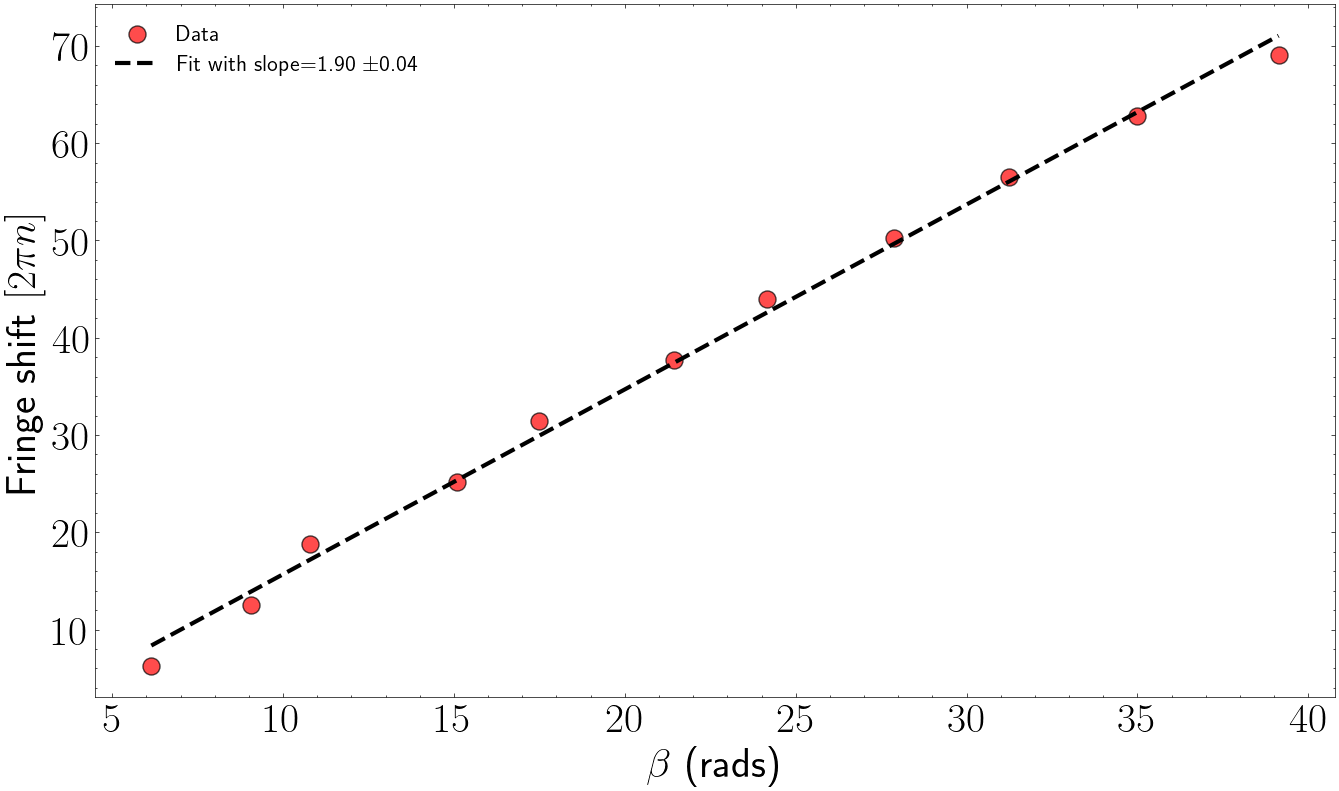

In [22]:
plt.figure(figsize=(16,9))
plt.scatter(beta1, fshift1, color='r',label='Data',s=150,alpha=0.7,edgecolor='k')
plt.plot(beta1, linfit(beta1, *params1), color='k',label=f'Fit with slope={params1[0]:.2f} '+r"$\pm$"+f'{perr1[0]:.2f}',linewidth=3, ls='--')
plt.legend()
plt.xlabel(r'$\beta$ (rads)')
plt.ylabel(r'Fringe shift $[2 \pi n]$')
plt.savefig('fsb_1.png', dpi=300)

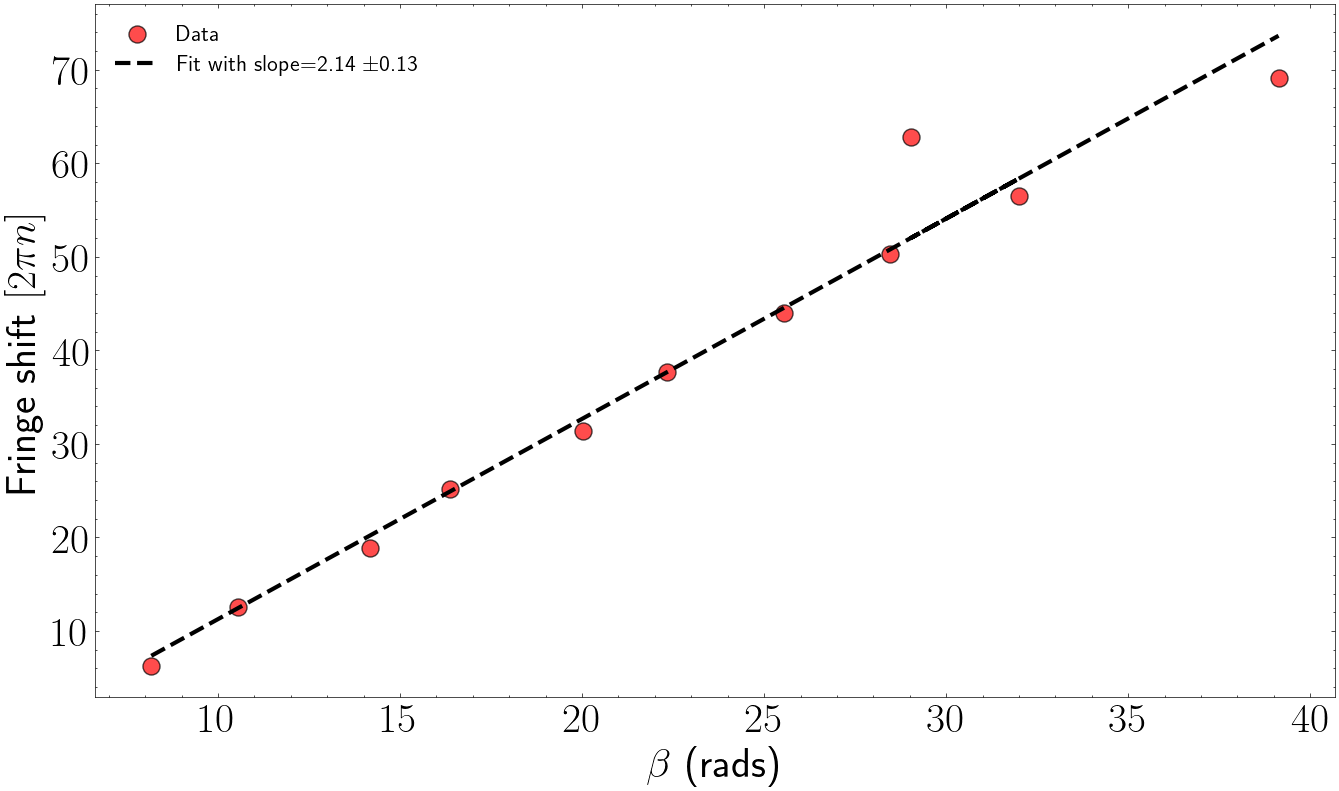

In [20]:
plt.figure(figsize=(16,9))
plt.scatter(beta2, fshift2, color='r',label='Data',s=150,alpha=0.7,edgecolor='k')
plt.plot(beta2, linfit(beta2, *params2), color='k',label=f'Fit with slope={params2[0]:.2f} '+r"$\pm$"+f'{perr2[0]:.2f}',linewidth=3, ls='--')
plt.legend()
plt.xlabel(r'$\beta$ (rads)')
plt.ylabel(r'Fringe shift $[2 \pi n]$')
plt.savefig('fsb_2.png', dpi=300)

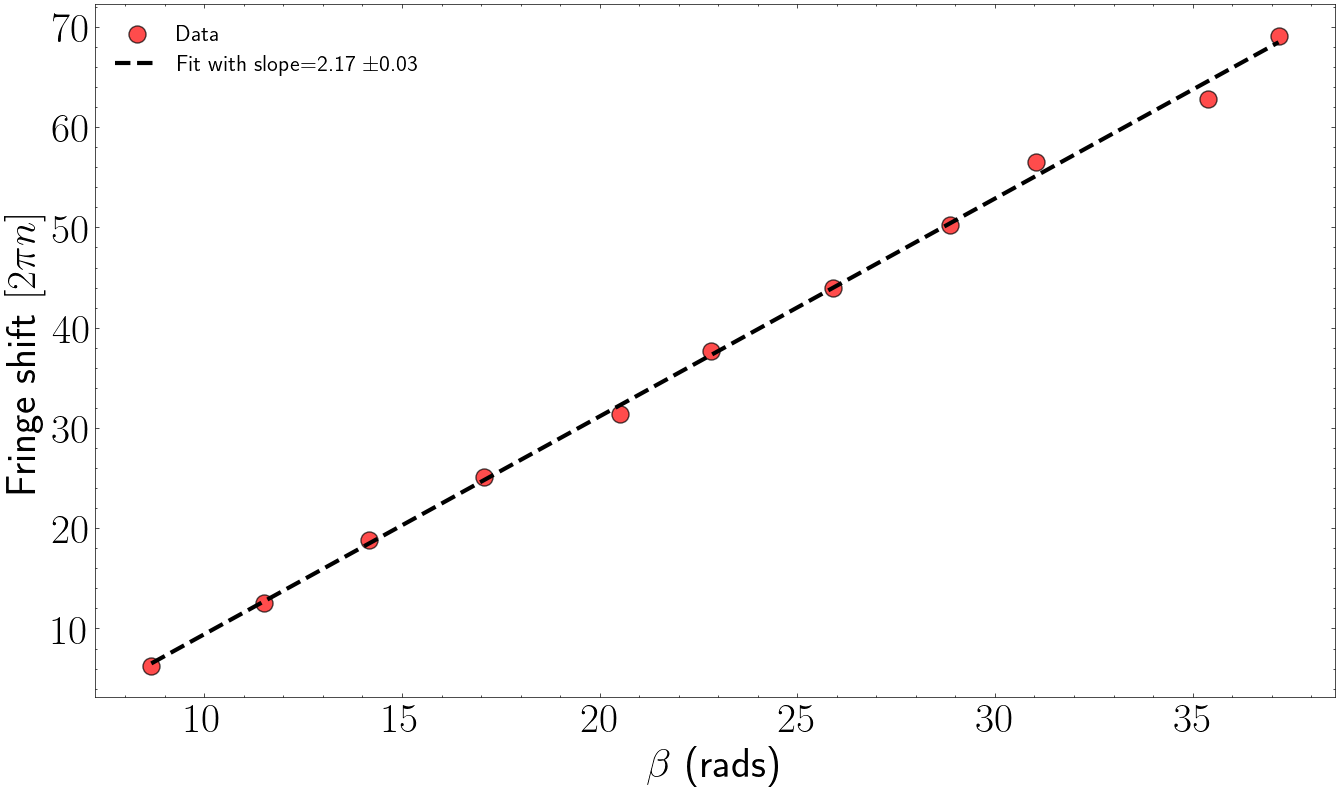

In [19]:
plt.figure(figsize=(16,9))
plt.scatter(beta3, fshift3, color='r',label='Data',s=150,alpha=0.7,edgecolor='k')
plt.plot(beta3, linfit(beta3, *params3), color='k',label=f'Fit with slope={params3[0]:.2f} '+r"$\pm$"+f'{perr3[0]:.2f}',linewidth=3, ls='--')
plt.legend()
plt.xlabel(r'$\beta$ (rads)')
plt.ylabel(r'Fringe shift $[2 \pi n]$')
plt.savefig('fsb_rev.png', dpi=300)

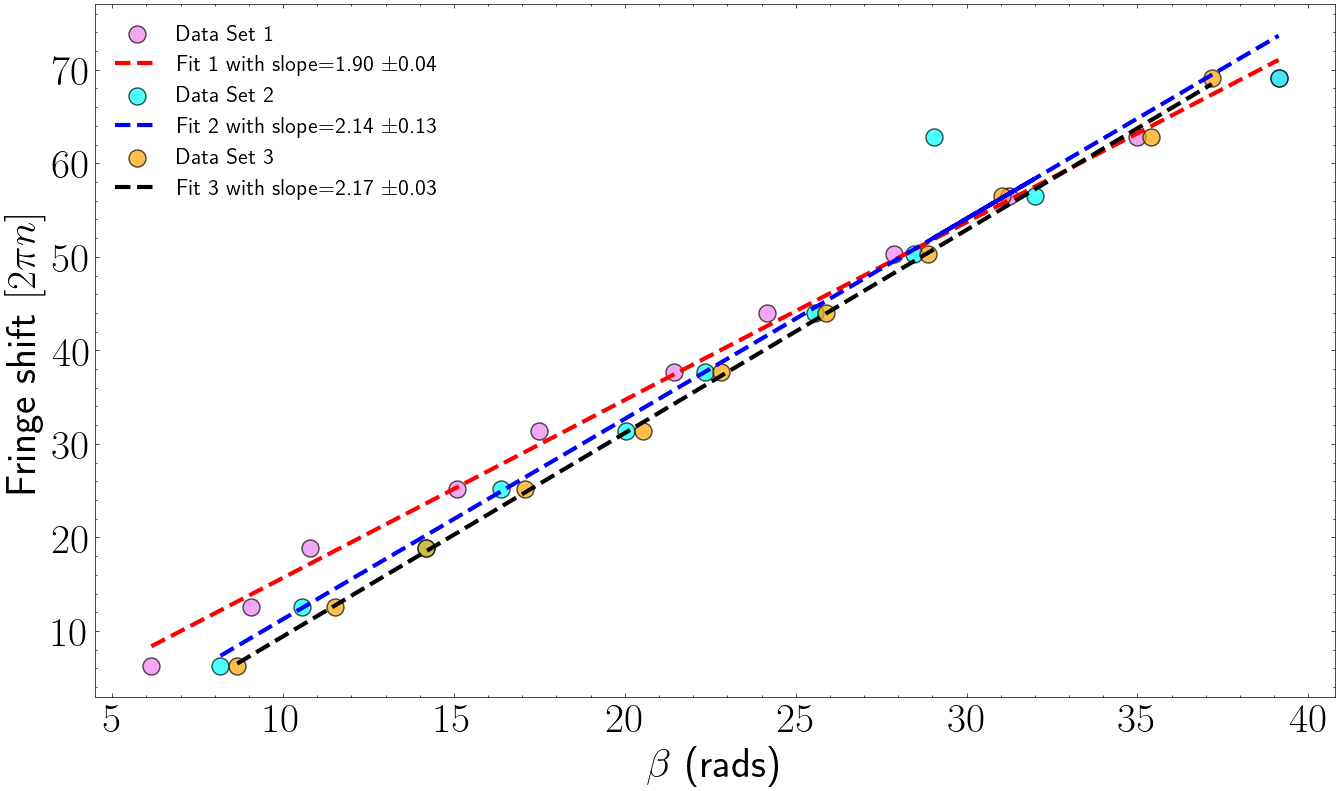

In [15]:
plt.figure(figsize=(16,9))
plt.scatter(beta1, fshift1, color='violet',label='Data Set 1',s=150,alpha=0.7,edgecolor='k')
plt.plot(beta1, linfit(beta1, *params1), color='r',label=f'Fit 1 with slope={params1[0]:.2f} '+r"$\pm$"+f'{perr1[0]:.2f}',linewidth=3, ls='--')
plt.scatter(beta2, fshift2, color='cyan',label='Data Set 2',s=150,alpha=0.7,edgecolor='k')
plt.plot(beta2, linfit(beta2, *params2), color='b',label=f'Fit 2 with slope={params2[0]:.2f} '+r"$\pm$"+f'{perr2[0]:.2f}',linewidth=3, ls='--')
plt.scatter(beta3, fshift3, color='orange',label='Data Set 3',s=150,alpha=0.7,edgecolor='k')
plt.plot(beta3, linfit(beta3, *params3), color='k',label=f'Fit 3 with slope={params3[0]:.2f} '+r"$\pm$"+f'{perr3[0]:.2f}',linewidth=3, ls='--')
plt.legend()
plt.xlabel(r'$\beta$ (rads)')
plt.ylabel(r'Fringe shift $[2 \pi n]$')
plt.savefig('fsb_all.png', dpi=300)